In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from core.clustering import pca, plot_pca_grid
from core.semcor_bert_pipeline import load_data
from sklearn.decomposition import PCA

In [2]:
perf_data = pd.read_csv('../data/model_perf.csv')

In [3]:
words = perf_data['Lemma']
pca_data = []

In [4]:
for w in words:
    word, pos = w.split(".")
    data = load_data(word, pos, 'semcor')
    e = data['embeddings']
    for n in np.arange(2, 11):
        var = pca(e, n)
        pca_data.append({'type': w, 'n_pcs': n, 'pct_var_explained': var})

In [5]:
pc_variances = pd.DataFrame(pca_data)
df = pc_variances.merge(perf_data, left_on = 'type', right_on = 'Lemma')

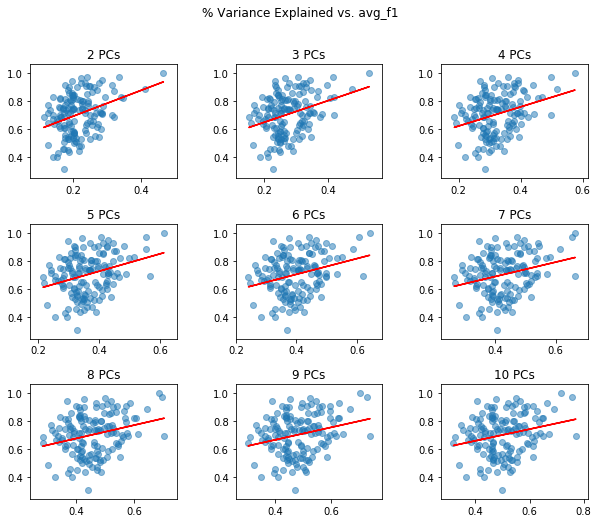

In [31]:
plot_pca_grid(df, 'avg_f1', fit_line = True)

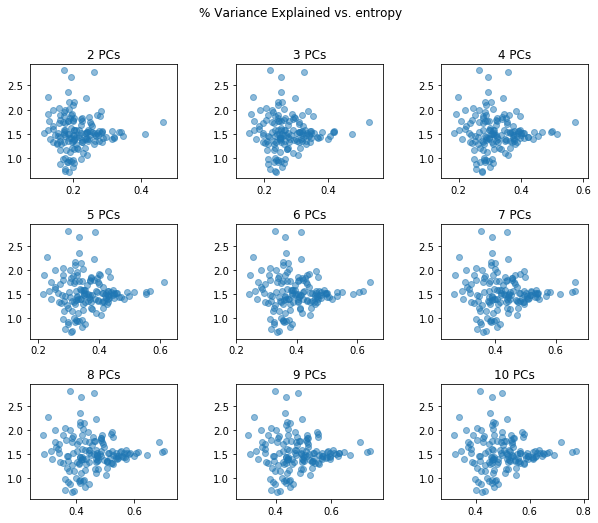

In [32]:
plot_pca_grid(df, 'entropy')

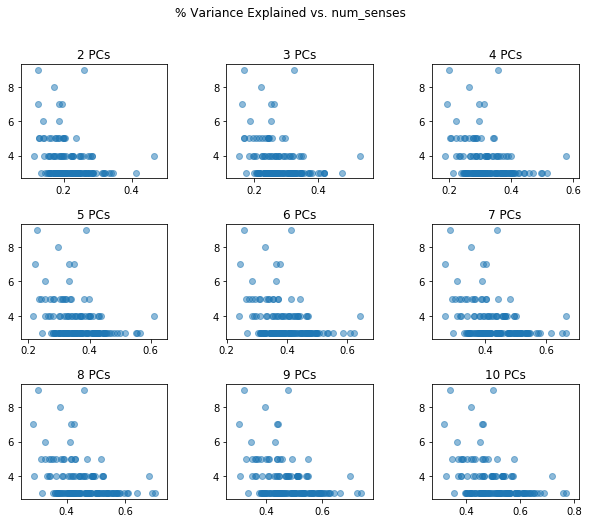

In [33]:
plot_pca_grid(df, 'num_senses')